In [26]:
from pathlib import Path
from textatistic import Textatistic
import googletrans
from googletrans import Translator
import spacy
import re
import numpy as np
from pathlib import Path
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import nltk
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import imageio
from wordcloud import WordCloud
from textatistic import Textatistic
from textblob import Word

In [6]:
#1
text = Path('novel.txt').read_text()
readability = Textatistic(text)
readability.dict()

{'char_count': 237618,
 'word_count': 52904,
 'sent_count': 6610,
 'sybl_count': 63921,
 'notdalechall_count': 10925,
 'polysyblword_count': 1505,
 'flesch_score': 96.4937772484537,
 'fleschkincaid_score': 1.7887084905653925,
 'gunningfog_score': 4.339362521856162,
 'smog_score': 5.85501591985483,
 'dalechall_score': 7.294211793478348}

In [7]:
#it is elementary reading level

In [9]:
blob = TextBlob(Path('novel.txt').read_text())

In [10]:
#2
blob.tags

[('WILLIWAW', 'NNP'),
 ('_A', 'NNP'),
 ('Novel_', 'NNP'),
 ('WILLIWAW', 'NNP'),
 ('A', 'NNP'),
 ('NOVEL', 'NNP'),
 ('By', 'IN'),
 ('GORE', 'NNP'),
 ('VIDAL', 'NNP'),
 ('1946', 'CD'),
 ('E.', 'NNP'),
 ('P.', 'NNP'),
 ('DUTTON', 'NNP'),
 ('&', 'CC'),
 ('COMPANY', 'NNP'),
 ('INC.', 'NNP'),
 ('NEW', 'NNP'),
 ('YORK', 'NNP'),
 ('_Copyright', 'NNP'),
 ('1946', 'CD'),
 ('by', 'IN'),
 ('E.', 'NNP'),
 ('P.', 'NNP'),
 ('Dutton', 'NNP'),
 ('&', 'CC'),
 ('Co.', 'NNP'),
 ('Inc._', 'NNP'),
 ('_All', 'NNP'),
 ('rights', 'NNS'),
 ('reserved', 'VBN'),
 ('Printed', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('U.S.A._', 'NNP'),
 ('[', 'NNP'),
 ('Illustration', 'NNP'),
 (']', 'NNP'),
 ('FIRST', 'NNP'),
 ('EDITION', 'NNP'),
 ('_NO', 'NNP'),
 ('PART', 'NNP'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('book', 'NN'),
 ('may', 'MD'),
 ('be', 'VB'),
 ('reproduced', 'VBN'),
 ('in', 'IN'),
 ('any', 'DT'),
 ('form', 'NN'),
 ('without', 'IN'),
 ('permission', 'NN'),
 ('in', 'IN'),
 ('writing', 'VBG'),
 ('from', 'IN'),
 ('the'

In [11]:
#3
blob.noun_phrases

WordList(['williwaw', 'novel_ williwaw', 'novel', 'gore vidal', 'e. p. dutton', 'company', 'inc. new york', 'e. p. dutton', 'inc._', '_all rights', 'printed', 'u.s.a._', 'illustration', 'first edition', 'part', 'brief passages', 'radio broadcast_', '_american book', 'stratford', 'york_', 'nina_ note', 'indian word', 'big wind', 'aleutian', 'alaskan', 'strong wind', 'word williwaw', 'sudden wind', 'colloquial sense', 'g.v', 'williwaw', 'novel_', 'one_', 'someone', 'sentimental song', 'square window', 'sea gull', 'hey', 'skipper', 'chow ’ s', 'ready below. ”', 'slowly', 'cautiously', 'negro', 'turn', 'damn thing', 'o.k.', 'skipper', 'mate ’ s voice', 'wasn ’ t', 'mr evans', 'evans', 'six-twenty.', 'evans', 'don ’ t look', 'it. ”', 'anything', 'weather', 'such things', 'weather', 'piling. ”', 'evans', '’ ll', 'whole ship', 'month anyway. ”', 'evans', 'olive-drab shirt', 'high-ranking', 'aleutians', 'warrant', 'officer insignia', 'hands shook', 'bervick', 'guess. ” “', '’ s', 'joe', '’ s',

In [13]:
#4
nlp = spacy.load("en_core_web_sm")

In [14]:
doc1 = nlp(Path('novel.txt').read_text())

In [15]:
for entity in doc1.ents:
    print(f'{entity.text}:{entity.label_}')

WILLIWAW:ORG
WILLIWAW:GPE
1946:DATE
INC:ORG
NEW YORK:GPE
Copyright:PERSON
1946:DATE
E. P. Dutton & Co.:ORG
U.S.A.:GPE
American Book--Stratford Press, Inc.:WORK_OF_ART
New York:GPE
Nina:NORP
Williwaw:PERSON
Indian:NORP
Aleutian:NORP
Alaskan:NORP
WILLIWAW:ORG
Chapter One:LAW
Indian:NORP
Negro:ORG
O.K., Skipper:WORK_OF_ART
second:ORDINAL
second:ORDINAL
Evans:PERSON
Evans:PERSON
Six-twenty:CARDINAL
Evans:PERSON
one:CARDINAL
two:CARDINAL
four hours and thirty minutes:TIME
last night:TIME
Evans:PERSON
this month:DATE
Evans:PERSON
Aleutians:NORP
Bervick:PERSON
Joe:PERSON
Evans:PERSON
Bervick:PERSON
Bervick:PERSON
five:CARDINAL
Evans:PERSON
Evans:PERSON
Bervick:PERSON
Norwegian:NORP
thirty:CARDINAL
Evans:PERSON
Fair:ORG
Diesel:ORG
John Smith:PERSON
Indian:NORP
Alaska:GPE
Evans:PERSON
Evans:PERSON
Smitty:ORG
last night:TIME
Evans:PERSON
O.K. I:WORK_OF_ART
two:CARDINAL
One:CARDINAL
Orleans Frenchman:PERSON
Arunga:PERSON
Evans:PERSON
Evans:PERSON
Evans:PERSON
Arunga:PERSON
a week:DATE
Arunga:PERS

Bervick:PERSON
Bervick:PERSON
last five minutes:TIME
Evans:PERSON
over a hundred miles:QUANTITY
Evans:PERSON
every minute:TIME
Bervick:PERSON
Bervick:PERSON
Evans:PERSON
Martin:PERSON
Only eight minutes:TIME
Evans:PERSON
hours:TIME
Ten minutes:TIME
Bervick:PERSON
Martin:PERSON
Evans:PERSON
Evans:PERSON
Gray:PERSON
Evans:PERSON
Kulak:PERSON
Evans:PERSON
Evans:PERSON
Evans:PERSON
Evans:PERSON
Evans:PERSON
Evans:PERSON
Evans:PERSON
Two:CARDINAL
Evans:PERSON
Evans:PERSON
two:CARDINAL
one:CARDINAL
Martin:PERSON
Evans:PERSON
Evans:PERSON
fifteen minutes:TIME
Evans:PERSON
Evans:PERSON
two:CARDINAL
Evans:PERSON
Barkison:PERSON
one:CARDINAL
Evans:PERSON
one:CARDINAL
Evans:PERSON
Chaplain:GPE
three:CARDINAL
Major:PERSON
today:DATE
Hodges:ORG
two:CARDINAL
Major:PERSON
Major:ORG
Hodges:GPE
first:ORDINAL
Evans:PERSON
two:CARDINAL
Evans:PERSON
Evans:PERSON
Bervick:PERSON
Bervick:PERSON
Evans:PERSON
Evans:PERSON
Bervick:PERSON
Evans:PERSON
Bervick:PERSON
two:CARDINAL
One:CARDINAL
Kulak:PERSON
Martin:

In [16]:
#5
blob.sentiment

Sentiment(polarity=0.07220734220574819, subjectivity=0.4845239137559079)

In [19]:
#neutral tone, mix factual and opinion 
blob = TextBlob(Path('novel.txt').read_text(), analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=1.358541389357792e-125)

In [28]:
#it's positive tone
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trinhnguyen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
#6
stop_words = stopwords.words('english')
stop_words


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

In [31]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[1:21]
top20

[('”', 2153),
 ('’', 1505),
 ('evans', 619),
 ('said', 446),
 ('bervick', 365),
 ('martin', 294),
 ('major', 256),
 ('would', 208),
 ('one', 201),
 ('looked', 186),
 ('get', 185),
 ('like', 179),
 ('ship', 178),
 ('hodges', 161),
 ('chaplain', 159),
 ('could', 151),
 ('chief', 150),
 ('know', 149),
 ('duval', 148),
 ('see', 145)]

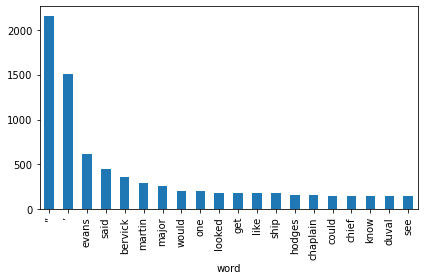

In [32]:
df = pd.DataFrame(top20, columns=['word', 'count'])
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

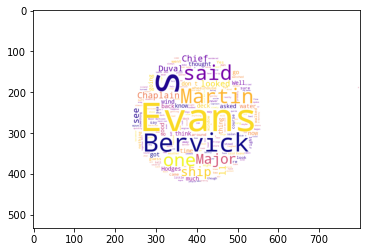

In [33]:
#7
text = Path('novel.txt').read_text()
mask_image = imageio.imread('flag.png')
wordcloud = WordCloud(colormap='plasma',mask=mask_image,background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('novelflag.png')
plt.imshow(wordcloud)